# INM430 - Tiny DS Project Progress Report


***

**Student Name:** Victor Ceballos Espinosa

**Project Title:** League of Legends. Identifying boosted accounts

***




<img src="images/lol_logo.png">
<p style="text-align: center;">Image from <a href="https://euw.leagueoflegends.com/">https://euw.leagueoflegends.com/es/</a></p>

In [1]:
import requests
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import pickle
from random import sample
from sklearn.preprocessing import MinMaxScaler

In [2]:
from enum import Enum
class League(Enum):
    BRONZE = 'BRONZE'
    SILVER = 'SILVER'
    GOLD = 'GOLD'
    PLATINUM = 'PLATINUM'
    DIAMOND = 'DIAMOND'
    MASTER = 'MASTER'
    GRANDMASTER = 'GRANDMASTER'
    CHALLENGER = 'CHALLENGER'

Initialize some como variables used along the whole notebook

In [3]:
# For security purposes, I am not providing my token
apiToken = "RGAPI-62b06103-5c87-4cf8-b568-f05a7797916a"

leagues = [League.BRONZE, 
           League.SILVER, 
           League.GOLD, 
           League.PLATINUM,
           League.DIAMOND,
           League.MASTER,
           League.GRANDMASTER, 
           League.CHALLENGER]
divisions = ['I', 'II', 'III', 'IV']
colors = ['#cd7f32', '#c0c0c0', '#d4af37', '#e5e4e2', '#b9f2ff', '#5a3379', '#fc3336', '#ffb31c']

In [4]:
def leagues_as_strings(leagues):
    return list(map(lambda each: each.name, leagues))

# Data retrieval and wrangling

## Get basic data for each summoner

In this section, the number of wins and losses for each player are retrieved. Additionally, the summoner ID is obtained in order to get the account id and the summoner name later. Finally, a new column called *league* is added in order to keep track of to which league the summoner belongs to.

To reduce the noise in the retrieved data, the players that are about to drop the league or the ones that have just joined it are not taken into account. This is made by just taking the ones with a value of False in the column *freshBlood*.

In [4]:
def get_basic_data_for(league):
    
    result = pd.DataFrame(columns = ['wins', 'losses', 'summonerId', 'league'])
    
    for division in divisions:
        r = requests.get('https://euw1.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/' + league + '/' + division + '?page=1',
             headers = {
                 "Origin": "https://developer.riotgames.com",
                 "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
                 "X-Riot-Token": apiToken,
                 "Accept-Language": "en,es-ES;q=0.9,es;q=0.8",
                 "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"
             })

        data = DataFrame(r.json())
        data['league'] = league
        data = data[data['freshBlood'] == False][['wins', 'losses', 'summonerId', 'league']]
        #data = data[data['veteran']][['wins', 'losses', 'summonerId', 'league']]
        
        result = pd.concat([result, data])
        
        time.sleep(1.3)
    
    return result

In [5]:
def get_basic_data_challenger():
    
    r = requests.get('https://euw1.api.riotgames.com/lol/league/v4/challengerleagues/by-queue/RANKED_SOLO_5x5',
                headers = {
                    "Origin": "https://developer.riotgames.com",
                    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
                    "X-Riot-Token": apiToken,
                    "Accept-Language": "en,es-ES;q=0.9,es;q=0.8",
                    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
                })

    challengersData = DataFrame(list(DataFrame(r.json())['entries']))
    challengersData['league'] = 'CHALLENGER'
    return challengersData[challengersData['freshBlood'] == False][['wins', 'losses', 'summonerId', 'league']]

In [6]:
def get_basic_data_master():
    
    
    r = requests.get('https://euw1.api.riotgames.com/lol/league/v4/masterleagues/by-queue/RANKED_SOLO_5x5',
         headers = {
             "Origin": "https://developer.riotgames.com",
             "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
             "X-Riot-Token": apiToken,
             "Accept-Language": "en,es-ES;q=0.9,es;q=0.8",
             "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"
         })

    data = DataFrame(list(DataFrame(r.json())['entries']))
    data['league'] = 'MASTER'
    data = data[data['freshBlood'] == False][['wins', 'losses', 'summonerId', 'league']]
    
    return data

In [7]:
def get_basic_data_grandmaster():
    
    
    r = requests.get('https://euw1.api.riotgames.com/lol/league/v4/grandmasterleagues/by-queue/RANKED_SOLO_5x5',
         headers = {
             "Origin": "https://developer.riotgames.com",
             "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
             "X-Riot-Token": apiToken,
             "Accept-Language": "en,es-ES;q=0.9,es;q=0.8",
             "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"
         })

    data = DataFrame(list(DataFrame(r.json())['entries']))
    data['league'] = 'GRANDMASTER'
    data = data[data['freshBlood'] == False][['wins', 'losses', 'summonerId', 'league']]

    time.sleep(1.3)
    
    return data

In [71]:
allData = pd.DataFrame()

for league in leagues:
    
    if league.name == 'CHALLENGER':
        allData = pd.concat([allData, get_basic_data_challenger()])
    elif league.name == 'MASTER':
        allData = pd.concat([allData, get_basic_data_master()])
    elif league.name == 'GRANDMASTER':
        allData = pd.concat([allData, get_basic_data_grandmaster()])
    else:
        allData = pd.concat([allData, get_basic_data_for(league.name)])
        
allData['totalGames'] = allData['wins'] + allData['losses']
allData['winRatio'] = allData['wins'] / allData['losses']
allData['winProbability'] = allData['wins'] / allData['totalGames']

(7159, 7)

From this point on, the goal is retrieving the statistics of every player's past matches. However, to accomplish this, it is recessary using the result of an API as the parameters of the next one. This make the task harder than expected.

## Get account ids and summoner level

The account ids are neccesary to retrieve the match ids of the past games of each summoner (player).

In [40]:
def get_summoner_account(summonerId):
        
    r = requests.get('https://euw1.api.riotgames.com/lol/summoner/v4/summoners/' + summonerId,
            headers = {
                "Origin": "https://developer.riotgames.com",
                "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
                "X-Riot-Token": apiToken,
                "Accept-Language": "en,es-ES;q=0.9,es;q=0.8",
                "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
            })
    
    #Becuase the API have a limit of 100 requests every 2 minutes
    time.sleep(1.2)
    
    return [summonerId, r.json().get('name'), r.json().get('accountId'), r.json().get('summonerLevel')]

In [80]:
summoner_account_ids = []

for summoner_id in allData['summonerId']:
    try:
        summoner_account_ids.append(get_summoner_account(summoner_id))
    except:
        continue
temporal_df = pd.DataFrame(summoner_account_ids, columns = ['summonerId', 'summonerName', 'accountId', 'summonerLevel'])
allData = allData.merge(temporal_df, on = 'summonerId', how = 'inner')

## Get match idS for each summoner

The match id is necessary to get the match history URI of the player and therefore obtain the statistics of the past matches.

In [6]:
def get_matches_id(account_id):
    
    response = requests.get('https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/' + str(account_id),
            headers = {
                "Origin": "https://developer.riotgames.com",
                "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
                "X-Riot-Token": apiToken,
                "Accept-Language": "en,es-ES;q=0.9,es;q=0.8",
                "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
            })

    #Becuase the API have a limit of 100 requests every 2 minutes
    time.sleep(1.3)
    
    result = []
    
    for match in response.json().get('matches'):
        result.append([match.get('gameId'), match.get('platformId')])
    
    return result

In [7]:
game_ids_per_account_id = {}

for account_id in allData['accountId']:
    try:
        game_ids_per_account_id[account_id] = get_matches_id(account_id)
    except:
        continue

## Get player stats

Finally, given the match id, it is possible to obtain the stats of that game for the specific player

In [40]:
def get_server_for(platform_id):
    return platform_id.lower()

In [ ]:
def get_stats_for_match(match_id, platform_id, summoner_name):
    
    server = get_server_for(platform_id)
    
    response = requests.get('https://' + server +  '.api.riotgames.com/lol/match/v4/matches/' + str(match_id),
            headers = {
                "Origin": "https://developer.riotgames.com",
                "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
                "X-Riot-Token": apiToken,
                "Accept-Language": "en,es-ES;q=0.9,es;q=0.8",
                "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
            })
    
    players = response.json().get('participantIdentities')

    #Becuase the API have a limit of 100 requests every 2 minutes
    time.sleep(1.3)
    
    for each in players:
        if each.get('player').get('summonerName') == summoner_name:
            participant_id = each.get('participantId')
            
            for participant in response.json().get('participants'):
                if participant.get('participantId') == participant_id:            
                    stats = participant.get('stats')
                    stats['gameDuration'] = response.json().get('gameDuration')
                    return stats


There are around 7K players, and more than 100 games per player. Keeping in mind that there is a requests limit of 100 requests every 2 minutes, it means that to get the stats of each game of each player it will take more than a week (1.3 seconds x 7000 players x 100 games / 60 / 60 / 24 = 8 days aproximately)

Therefore, retrieving all the data, is unfeasible. The decision have been taken randomly 10 games of each player, reducing the time to get all the data to a day aproximately. This may include some noise in the results. However, to keep the introduced noise in a minimum level, the 10 games have been taken randomly from each player. In this way, in case the player had a good streak it will not take all the matches in such streak.

In [ ]:
stats_per_summoner_name = {}

for accountId, gameIds in list(game_ids_per_account_id.items()):
    summonerName = allData[allData['accountId'] == accountId]['summonerName'].iloc[0]
    for gameId, platformId in sample(gameIds, 10):
        try: 
            if summonerName in stats_per_summoner_name.keys():
                stats_per_summoner_name[summonerName].append(get_stats_for_match(gameId, platformId, summonerName))
            else:
                stats_per_summoner_name[summonerName] = [get_stats_for_match(gameId, platformId, summonerName)]
        except:
            continue  

In [13]:
columns_to_get = ['kills', 'deaths', 'assists', 'largestKillingSpree', 'largestMultiKill',
       'killingSprees', 'longestTimeSpentLiving', 'doubleKills', 'tripleKills',
       'quadraKills', 'pentaKills', 'unrealKills', 'totalDamageDealt',
       'magicDamageDealt', 'physicalDamageDealt', 'trueDamageDealt',
       'largestCriticalStrike', 'totalDamageDealtToChampions',
       'magicDamageDealtToChampions', 'physicalDamageDealtToChampions',
       'trueDamageDealtToChampions', 'totalHeal', 'totalUnitsHealed',
       'damageSelfMitigated', 'damageDealtToObjectives',
       'damageDealtToTurrets', 'visionScore', 'timeCCingOthers',
       'totalDamageTaken', 'magicalDamageTaken', 'physicalDamageTaken',
       'trueDamageTaken', 'goldEarned', 'goldSpent', 'turretKills',
       'inhibitorKills', 'totalMinionsKilled', 'neutralMinionsKilled',
       'neutralMinionsKilledTeamJungle', 'neutralMinionsKilledEnemyJungle',
       'totalTimeCrowdControlDealt', 'champLevel', 'visionWardsBoughtInGame',
       'sightWardsBoughtInGame', 'wardsPlaced', 'wardsKilled', 'gameDuration', 'league', 'summonerName']

In [14]:
def remove_none_stats(stats_list):
    return [stat for stat in stats_list if stat]

In [19]:
allStats = pd.DataFrame(columns = columns_to_get)

for summoner_name, stats in stats_per_summoner_name.items():
    stats = remove_none_stats(stats)
    if len(stats) > 0:
        try:
            temp_df = pd.DataFrame(stats)[columns_to_get[:-2]]
            temp_df['league'] = allData[allData['summonerName'] == summoner_name]['league'].iloc[0]
            temp_df['summonerName'] = summoner_name
            allStats = pd.concat((allStats, temp_df), axis = 0)
        except:
            continue

At this point, we have all the stats that we are interested in from most of the players. Getting some data from some players has generated errors querying the API. Therefore, we have less players that expected. However, I still have around five thousands players and an average of 10 games per players.

## Inputing missing values

This statistics data includes null or NaN values. In order to fill them, the average of the corresponding value for each player is going to be inputed as a attempt to respect the distributions.

In [25]:
for summoner_name in allStats['summonerName'].unique():
    stats_for_summoner = allStats[allStats['summonerName'] == summoner_name]
    allStats.loc[allStats['summonerName'] == summoner_name, 'neutralMinionsKilledEnemyJungle'] = stats_for_summoner['neutralMinionsKilledEnemyJungle'].fillna(stats_for_summoner['neutralMinionsKilledEnemyJungle'].mean())
    allStats.loc[allStats['summonerName'] == summoner_name, 'neutralMinionsKilledTeamJungle'] = stats_for_summoner['neutralMinionsKilledTeamJungle'].fillna(stats_for_summoner['neutralMinionsKilledTeamJungle'].mean())
    allStats.loc[allStats['summonerName'] == summoner_name, 'wardsPlaced'] = stats_for_summoner['wardsPlaced'].fillna(stats_for_summoner['wardsPlaced'].mean())
    allStats.loc[allStats['summonerName'] == summoner_name, 'wardsKilled'] = stats_for_summoner['wardsKilled'].fillna(stats_for_summoner['wardsKilled'].mean())

allStats.to_csv('data/allStatsWithGameDuration.csv', index = False)

As the total gold earned in a match depends a lot on the length of the game, it makes sense creating a variable that represents how much gold a player earned in each minute of the match. This represents better how good the player in getting gold to spend in objects to empower the used champion.

In [26]:
allStats['goldEarnedByMinute'] = allStats['goldEarned'] / allStats['gameDuration']

# Analysis

## Win ratio comparison

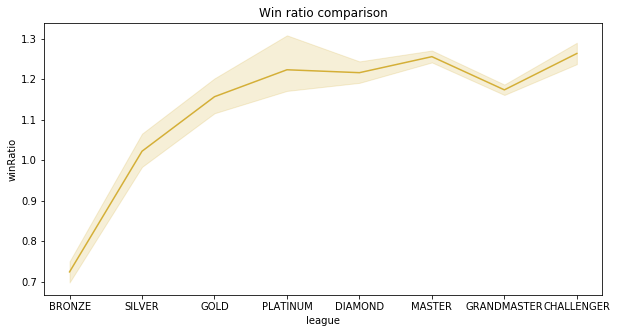

In [33]:
winRatios = [allData[allData['league'] == league]['winRatio'].median() for league in leagues_as_strings(leagues)]

plt.figure(figsize = (10, 5))
plt.title('Win ratio comparison')
sns.lineplot(x = 'league', y = 'winRatio', data = allData, color = '#d4af37', sort=False)

Two important things can be observed in this graph.
1. The win ratio tends to **increase little by litte** when moving to higher leagues. However, **in grandmaster it looks like it drops**.
2. The **confidence interval** plotted by default by Seaborn shows that **in platinum it is wider than the rest**. This may mean that platinum could be one of the **destination leagues after boosting the accounts**.

## Density functions for the winning probability of every league

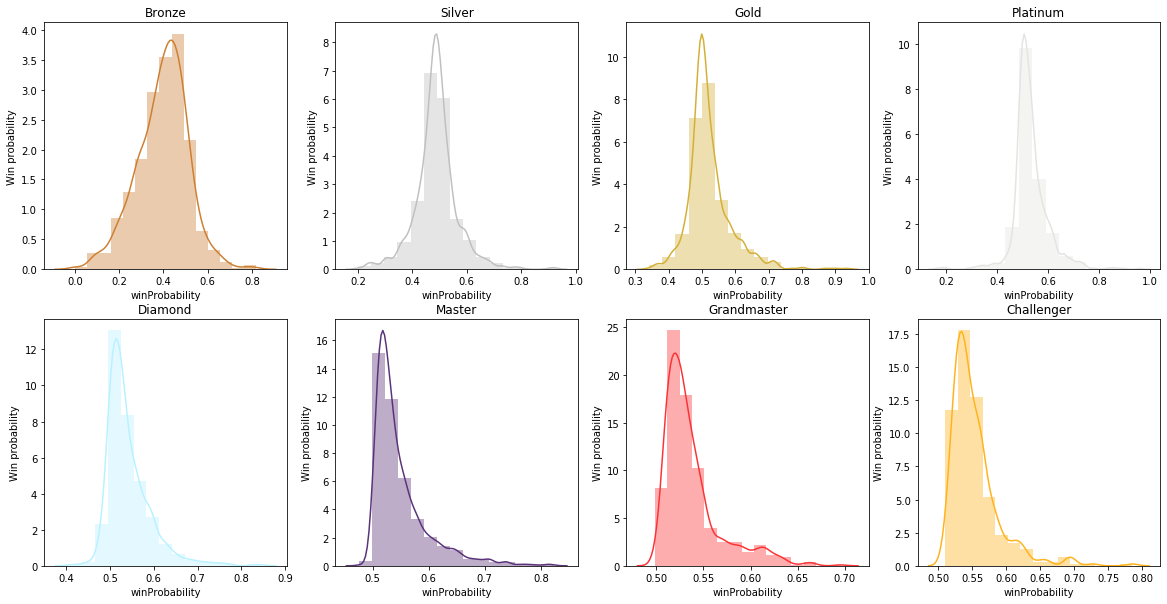

In [34]:
plt.figure(figsize = (20, 10))
for index, league in enumerate(leagues_as_strings(leagues)):
    plt.subplot(2, 4, index + 1)
    plt.xlabel('Leagues')
    plt.ylabel('Win probability')
    plt.title(league.capitalize())
    sns.distplot(allData[allData['league'] == league]['winProbability'], color = colors[index], bins = 15)

In this combined plot, it is shown the distribution of the winning probability for each league. Something interesting is happening. From Bronze to Platinum, the probability density distributions have a bell shape. However, in Diamond and Challenger, the probability density distributions are skeed positively. In addition, summoners win at least 50% of their matches.

Even though platinum is a high league, there are still players that have less than 50% chances of winning a match. This may reinforce the hypothesis that some account are boosted to platinum.

## Average total games played comparison

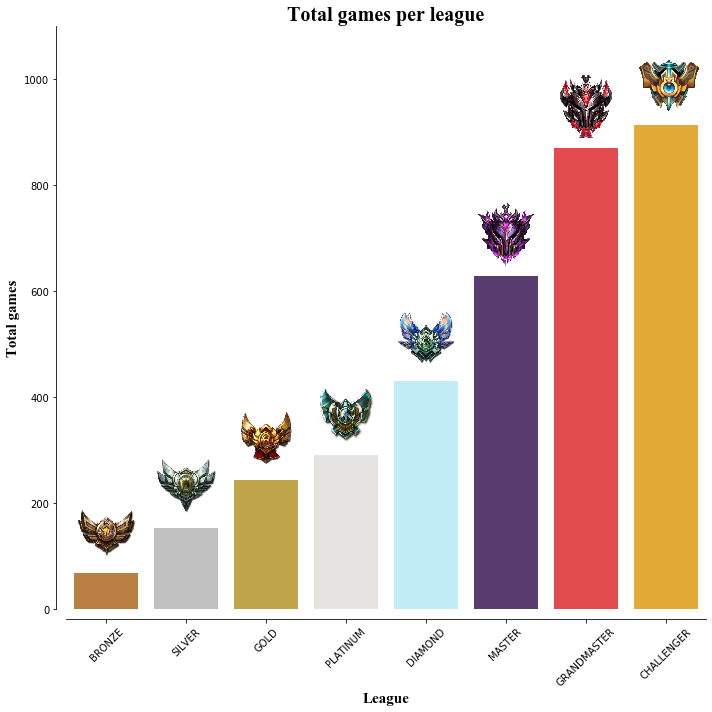

In [35]:
allData['totalGames'] = allData['totalGames'].apply(int)
totalGamesAverage = allData[['totalGames', 'league']].groupby(['league']).mean().reset_index()
totalGamesAverage['league'] = totalGamesAverage.replace({'BRONZE' : 0, 
                                                         'SILVER' : 1, 
                                                         'GOLD' : 2, 
                                                         'PLATINUM' : 3, 
                                                         'DIAMOND' : 4, 
                                                         'MASTER' : 5,
                                                         'GRANDMASTER' : 6,  
                                                         'CHALLENGER' : 7})

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.title('Total Games per league')
plt.ylim(0, 1100)

images_config = {'BRONZE' : {'image' : 'images/bronze.png', 'zoom' : 0.35}, 
                 'SILVER' : {'image' : 'images/silver.png', 'zoom' : 0.35},
                 'GOLD' : {'image' : 'images/gold.png', 'zoom' : 0.3},
                 'PLATINUM' : {'image' : 'images/platinum.png', 'zoom' : 0.3},
                 'DIAMOND' : {'image' : 'images/diamond.png', 'zoom' : 0.3},
                 'MASTER' : {'image' : 'images/master.png', 'zoom' : 0.2},
                 'GRANDMASTER' : {'image' : 'images/grandmaster.png', 'zoom' : 0.35},
                 'CHALLENGER' : {'image' : 'images/challenger.png', 'zoom' : 0.15},
                }

for index, league in enumerate(leagues):
    config = images_config.get(league.name)
    logo = mpimg.imread(config.get('image'))
    y = totalGamesAverage[totalGamesAverage['league'] == index]['totalGames'] + 80
    offset_image = OffsetImage(logo, zoom = config.get('zoom'))
    ax.add_artist(AnnotationBbox(offset_image, (index, y), frameon = False))

barplot = sns.barplot(data = totalGamesAverage, x = 'league', y = 'totalGames', palette = colors)
sns.despine(offset=10);
plt.xticks(np.arange(8), leagues_as_strings(leagues), rotation = 45);
plt.title('Total games per league', **{'fontname':'Times New Roman', 'fontsize': 20})
plt.ylabel('Total games', **{'fontname':'Times New Roman', 'fontsize': 15})
plt.xlabel('League', **{'fontname':'Times New Roman', 'fontsize': 15})
plt.tight_layout()
barplot.get_figure().savefig('images/barplot.png')

It can be observed that while moving forward higher leagues, from bronze to challenger, the number of played matches tends to increase. This make sense as player need to play a lot matches to refine them skills

## Win probability comparison

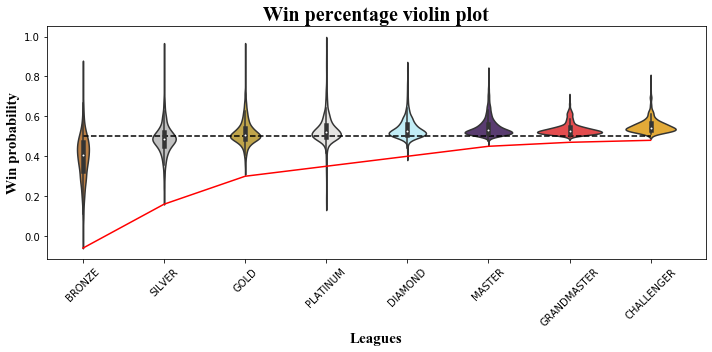

In [36]:
plt.figure(figsize = (10, 5))

sns.set_palette(sns.color_palette(colors))

violin_plot = sns.violinplot(x = "league", y = "winProbability", data = allData)
plt.plot(np.arange(8), [-0.06, 0.16, 0.3, 0.35, 0.40, 0.45, 0.47, 0.48], c = 'red')

plt.title('Win percentage violin plot', **{'fontname':'Times New Roman', 'fontsize': 20})
plt.hlines(0.5, 0, 7, linestyles = 'dashed')
plt.xticks(np.arange(8), leagues_as_strings(leagues), rotation = 45)
plt.xlabel('Leagues', **{'fontname':'Times New Roman', 'fontsize': 15})
plt.ylabel('Win probability', **{'fontname':'Times New Roman', 'fontsize': 15})

plt.tight_layout()

As it can be observed in the graph above, density functions for the probability of winning have been plotted. It can be observed that there is an expected behaviour and it is that the overall winning probability keeps increasing while moving to higher leagues. This make sense as the winning probability is calculated dividing the won games over the total played games for each player. However, it is clearly visible that in platinum, the lower tail's value of this density functions is smaller than what it should. The expected result would be it being over the red line which mark the tendency

# More data

Finally, one last approach has been tried. Although in the data retrieval section above the code to retrieve statistics for each player in each game is already written, it was at this point when I realized that more data was needed and so I got it. After saving all the statistics in a dataframe called *allStats*, I selected some of the most relevant statistics. This selection was carried out using domain knowledge as explained in the report.

One of those statistics is called KDA, which is calculated as follows:

$$ \frac{Kills + Assistances}{Deaths} $$

Basically, in a game, you can kill an oponent (kills) and be killed (deaths). In addition, you can assist on killing an enemy summoner (assists). It is importantant to note that if a player does not die in a game, his deaths will be substituted by 1 in order to be able to calculate the division. 

In [77]:
allStats['deaths_for_kda'] =  [1 if death == 0 else death for death in allStats['deaths']]
allStats['kda'] = (allStats['kills'] + allStats['assists']) / allStats['deaths_for_kda']

As explained before, KDA is a metric than can explain very good how good a summoner knows the champions they used in the games. Players in higher leagues know better the champions they use, therefore it is expected that the average KDA for each league rises. In platinum it can be observed that the average KDA drops into a value lower than the average KDA in Gold which is the previous league. This is an indicator that the hypothesis of paid boosted accounts could be true.

Finally, a radar graph per league was plotted in order to compare the statistics across all of them

# Radar graph

In [31]:
radar_stats = pd.DataFrame()
radar_stats['wardsPlaced'] = [allStats[allStats['league'] == league]['wardsPlaced'].mean() for league in leagues_as_strings(leagues)]
radar_stats['wardsKilled'] = [allStats[allStats['league'] == league]['wardsKilled'].mean() for league in leagues_as_strings(leagues)]
radar_stats['totalTimeCrowdControlDealt'] = [allStats[allStats['league'] == league]['totalTimeCrowdControlDealt'].mean() for league in leagues_as_strings(leagues)]
radar_stats['kda'] = [allStats[allStats['league'] == league]['kda'].mean() for league in leagues_as_strings(leagues)]
radar_stats['goldEarnedByMinute'] = [allStats[allStats['league'] == league]['goldEarnedByMinute'].mean() for league in leagues_as_strings(leagues)]

radar_stats = pd.DataFrame(MinMaxScaler().fit_transform(radar_stats), columns = radar_stats.columns)

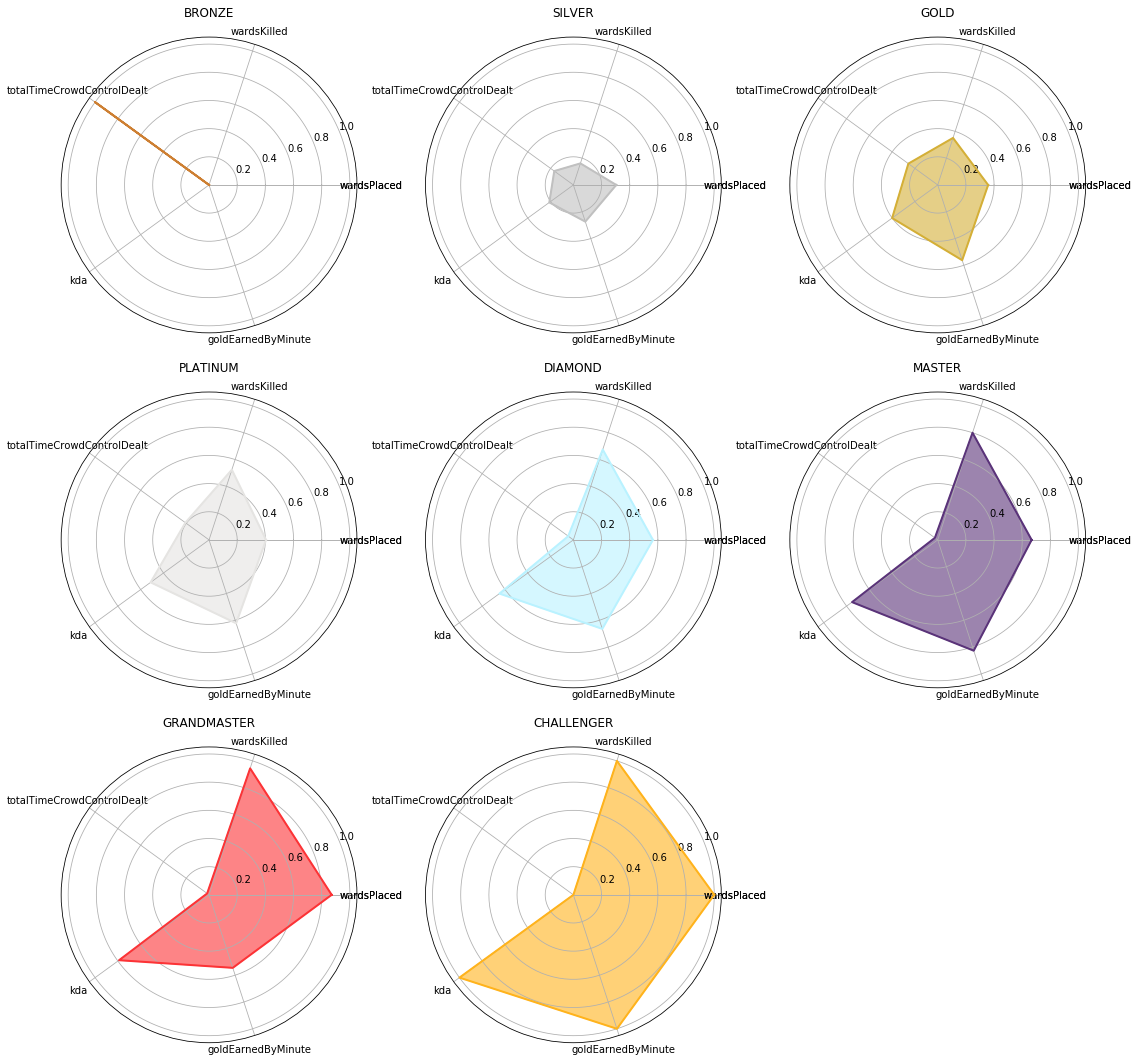

In [32]:
# Code adapted from: https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way

angles = np.linspace(0, 2 * np.pi, radar_stats.shape[1], endpoint = False)

radar_stats = pd.concat((radar_stats, radar_stats.iloc[:, 0]), axis = 1)
angles = np.concatenate((angles, [angles[0]]))

fig = plt.figure()
fig.set_size_inches(18.5, 18.5)

for i in range(radar_stats.shape[0]):
    ax = fig.add_subplot(3, 3, i + 1, polar = True)
    ax.plot(angles, radar_stats.transpose().iloc[:, i], linewidth = 2, c = colors[i])
    ax.plot(angles, radar_stats.transpose().iloc[:, 0], linewidth = 0)
    ax.fill(angles, radar_stats.transpose().iloc[:, i], alpha = 0.6, c = colors[i])
    ax.set_xticks(np.linspace(0, 1, 10))
    ax.set_thetagrids(angles * 180 / np.pi, radar_stats.columns)
    ax.set_title(leagues_as_strings(leagues)[i])
    ax.grid(True)

This radar graphs make comparing different statistics across all the leagues straightforward. There are some core points that are worth mentioning:
- WardsKilled and wardsPlaced values increases while moving towards higher leagues. This means than players in higher leagues take care more about the vision control.
- GoldEarnedByMinute also follows this pattern. This means that the ability to earn money is higher in better leagues. Improving the ability to collect gold could be a good recommendation for low-leagues players.
- As demonstrated by the increasing tendency of the KDA value, it is very important knowing the limitations and strenghts of the used champions to move towards higher leagues.
- Finally, another recommendation for low-leagues player could be taking care more about avoiding falling into crowd controls. The statistic called totalTimeCrowdControlDealt shows that in the three higher leagues, the value extremely slow.